## Exploring profiles of Psychological Optimal Functioning (FOP : Fonctionnement Optimal Psychologique) : Factor Scores

#### Methods used to compute factor scores in MPLUS are explained hereafter:
- Conceptually in the [MPLUS discussion groups](http://www.statmodel.com/discussion/messages/9/3778.html)
- In the technical notes [here](https://www.statmodel.com/download/techappen.pdf) or [here](https://www.statmodel.com/discussion/messages/9/8465.html)

### Step 1 : Preparing the Latent Class Data

In [78]:
# importing the basic packages for data exploration
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_info_columns', 1000)

In [79]:
# check current working directory
os.getcwd()

'd:\\Dropbox\\Projets\\Optimal Functioning\\@GRH\\05-2025\\Support_Methodo\\N_1066\\Python\\FOP_4cl\\code'

In [80]:
# check the files contained in the data folder
os.listdir('../data/1066')

['Base_1066_recodee_2017-06.txt',
 'Bi_ESEM_FOP_4cl_free.dat',
 'Bi_ESEM_FOP_5cl_free.dat',
 'Bi_ESEM_Fscores_1066.dat',
 'variable_names.txt']

In [81]:
# the data has no variables names so we need to provide these separately
var_names = ['POF','POSEM','NEGEM','FLOW','SELFDET','PERSEFF','STRENGTH','CPROB1','CPROB2','CPROB3','CPROB4','CL_FOP','ID']

In [82]:
# import the data outputted by the latent class analysis - the separator (delimiter) uses one or several spaces
df = pd.read_csv('../data/1066/Bi_ESEM_FOP_4cl_free.dat', sep='\s+', header = None, names=var_names )

In [83]:
# check the first few rows
df.head()

,POF,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH,CPROB1,CPROB2,CPROB3,CPROB4,CL_FOP,ID
0,0.936,0.323,-0.195,0.766,0.245,-0.108,0.424,0.0,0.062,0.003,0.935,4.0,303
1,-2.985,-0.818,1.207,-0.608,-0.762,-3.245,-0.227,0.0,0.000,1.000,0.000,3.0,864
2,-1.065,-0.474,-0.093,0.084,-0.432,1.250,-0.636,0.0,0.585,0.410,0.005,2.0,898
3,-0.172,1.213,-1.375,0.455,-1.076,2.045,1.731,0.0,0.014,0.986,0.000,3.0,162
4,0.266,-0.333,2.159,-0.455,-0.540,-1.349,-0.416,0.0,0.941,0.059,0.000,2.0,1204


### Step 2 : Visualize the factors scores as a function of the latent classes for interpretation

In [84]:
# generate a dataframe of the factor scores
factors_df = df.loc[:, ['POF','POSEM','NEGEM','FLOW','SELFDET','PERSEFF','STRENGTH','CL_FOP']]

In [85]:
# aggregate the factors scores by mean
factors_means_df = factors_df.groupby(factors_df['CL_FOP']).agg('mean')

In [86]:
factors_means_df

,POF,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH
CL_FOP,,,,,,,
1.0,1.641621,0.273310,-0.106690,0.088724,0.145931,0.354828,0.334931
2.0,-0.076937,-0.142811,0.371743,-0.002325,0.179199,-0.073418,-0.024423
3.0,-0.920566,-0.019955,-0.034906,-0.028774,-0.560925,0.120909,0.137185
4.0,0.666485,0.170017,-0.426625,0.017561,0.196849,-0.031634,-0.103517


In [87]:
# compute the proportion of each class
factors_df.groupby(factors_df['CL_FOP']).size() / len(factors_df)

CL_FOP
1.0    0.027205
2.0    0.401501
3.0    0.248593
4.0    0.322702
dtype: float64

In [88]:
# alternatively
factors_df['CL_FOP'].value_counts().sort_index(), factors_df['CL_FOP'].value_counts(normalize=True).sort_index()

(CL_FOP
 1.0     29
 2.0    428
 3.0    265
 4.0    344
 Name: count, dtype: int64,
 CL_FOP
 1.0    0.027205
 2.0    0.401501
 3.0    0.248593
 4.0    0.322702
 Name: proportion, dtype: float64)

In [89]:
# renames the classes according to the profiles for a more explicit labeling
factors_means_df.rename(index={
    1.0:"Full Optimal Functioning\n2.72% - positivity=4.04",
    2.0:"Moderate Anhedonic Functioning\n40.15% - positivity=1.98",
    3.0:"Amotivated Dysfunctioning\n24.86% - positivity=1.76",
    4.0:"Emotional(+) Optimal Functioning\n32.27% - positivity=3.40"
    }, inplace=True)

In [90]:
# Step 1: Extract positivity values using regex

import re
positivity_values = factors_means_df.index.to_series().apply(
    lambda x: float(re.search(r'positivity=([0-9.]+)', x).group(1))
)

# Step 2: Sort index by positivity values (descending order for positivity)
sorted_index = positivity_values.sort_values(ascending=True).index

# Step 3: Reindex the DataFrame
factors_means_df = factors_means_df.reindex(sorted_index)

display(factors_means_df)

,POF,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH
CL_FOP,,,,,,,
Amotivated Dysfunctioning\n24.86% - positivity=1.76,-0.920566,-0.019955,-0.034906,-0.028774,-0.560925,0.120909,0.137185
Moderate Anhedonic Functioning\n40.15% - positivity=1.98,-0.076937,-0.142811,0.371743,-0.002325,0.179199,-0.073418,-0.024423
Emotional(+) Optimal Functioning\n32.27% - positivity=3.40,0.666485,0.170017,-0.426625,0.017561,0.196849,-0.031634,-0.103517
Full Optimal Functioning\n2.72% - positivity=4.04,1.641621,0.273310,-0.106690,0.088724,0.145931,0.354828,0.334931


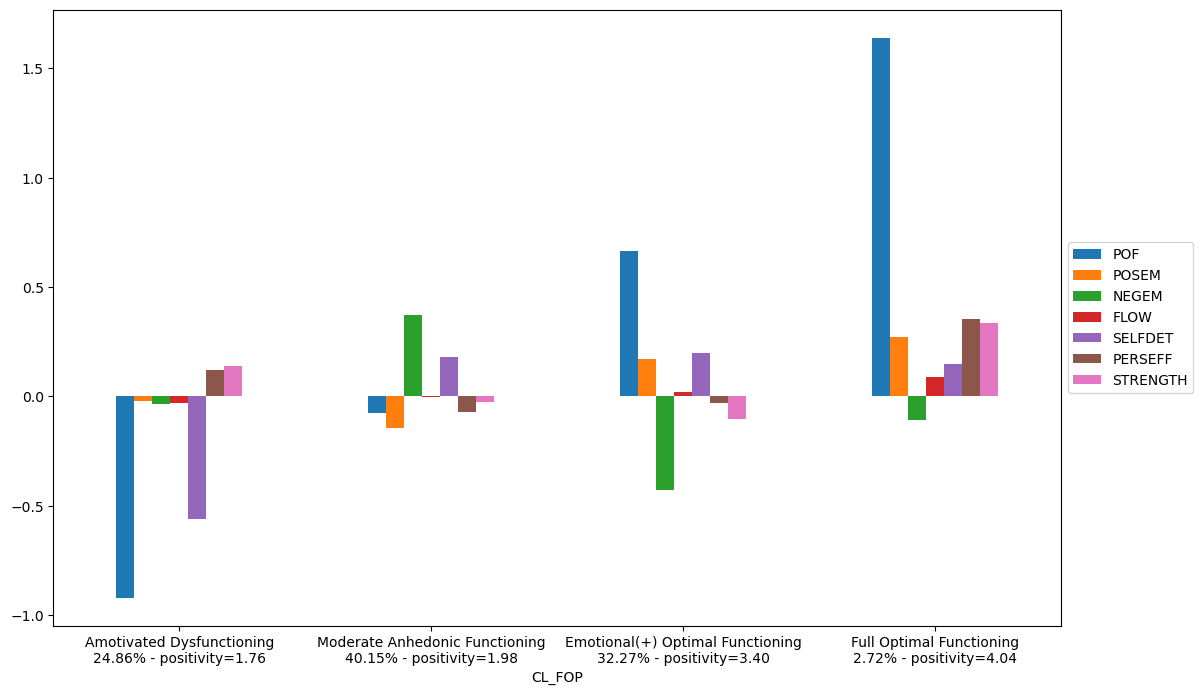

In [124]:
# plot the profiles
factors_means_df.plot(kind='bar', figsize=(13,8))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xticks(rotation=0)
plt.show()

## Merging the latent class & factors data with the raw data to better understand the latent class profiles

### Step 1 : Merging the datasets

In [92]:
# import the raw datafile n =1066
raw_df = pd.read_csv('../data/1066/Base_1066_recodee_2017-06.txt', sep = '\s+', encoding='ansi', na_values=999)

In [93]:
# check data structure
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 222 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    Id           1066 non-null   int64  
 1    Sexe         1066 non-null   int64  
 2    Age          1066 non-null   int64  
 3    Situfam      1066 non-null   int64  
 4    Enfant       1066 non-null   int64  
 5    Situpro      1066 non-null   int64  
 6    Typecontrat  1066 non-null   int64  
 7    Jourabsence  1065 non-null   float64
 8    Revenus      1066 non-null   int64  
 9    Nivetude     1066 non-null   int64  
 10   Taillentrep  1066 non-null   int64  
 11   Manager      1066 non-null   int64  
 12   CSP1         1066 non-null   int64  
 13   CSP2         1066 non-null   int64  
 14   Secteur      1066 non-null   int64  
 15   CodePostal   1062 non-null   float64
 16   ZoneFR1      1066 non-null   int64  
 17   ZoneFR2      1066 non-null   int64  
 18   MHCA1        1054 non-null

In [94]:
# Recode the Demarche Column
raw_df.rename(columns={'DÃ.marche':'Demarche'}, inplace=True)
raw_df.columns[196]

'Force9'

In [95]:
# select the sociodemographic & psychosocial risks variables
raw_var_names = ['Id','Sexe','Age','Situfam','Situpro','Revenus','Nivetude','Taillentrep','Manager','CSP1','CSP2','Secteur','ZoneFR1','ZoneFR2','Demarche','Jourabsence','cabs7','cabs1','cabs2','abs8','abs10']

In [96]:
# subselect a new dataframe
rps_df = raw_df[raw_var_names]

In [97]:
# replace variables to be consistent with previous research
rps_df.rename(columns={'Jourabsence':'GenAbs','cabs7':'ManAbs','cabs1':'PhysPres','cabs2':'PsycPres','abs8':'Turnover','abs10':'Unhappy'}, inplace=True)

C:\Users\Franck\AppData\Local\Temp\ipykernel_2580\1195482037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rps_df.rename(columns={'Jourabsence':'GenAbs','cabs7':'ManAbs','cabs1':'PhysPres','cabs2':'PsycPres','abs8':'Turnover','abs10':'Unhappy'}, inplace=True)


In [98]:
# chek the first few rows
rps_df.head()

,Id,Sexe,Age,Situfam,Situpro,Revenus,Nivetude,Taillentrep,Manager,CSP1,...,Secteur,ZoneFR1,ZoneFR2,Demarche,GenAbs,ManAbs,PhysPres,PsycPres,Turnover,Unhappy
0,303,2,43,1,2,2,2,1,1,5,...,11,5,8,2,1.0,0,7,10,3.0,2.0
1,864,1,56,2,2,3,2,1,1,6,...,5,4,7,2,1.0,0,7,10,5.0,5.0
2,898,2,40,2,2,1,4,6,1,5,...,4,1,1,2,3.0,1,7,10,4.0,3.0
3,162,2,57,1,2,3,3,5,1,6,...,11,3,6,1,1.0,0,7,10,5.0,5.0
4,1204,1,25,1,2,3,3,6,1,5,...,3,1,1,1,1.0,0,7,10,5.0,5.0


In [99]:
# merge...!
data = pd.merge(rps_df,df, left_on="Id",right_on="ID").drop(columns=['ID'])

In [100]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1066 non-null   int64  
 1   Sexe         1066 non-null   int64  
 2   Age          1066 non-null   int64  
 3   Situfam      1066 non-null   int64  
 4   Situpro      1066 non-null   int64  
 5   Revenus      1066 non-null   int64  
 6   Nivetude     1066 non-null   int64  
 7   Taillentrep  1066 non-null   int64  
 8   Manager      1066 non-null   int64  
 9   CSP1         1066 non-null   int64  
 10  CSP2         1066 non-null   int64  
 11  Secteur      1066 non-null   int64  
 12  ZoneFR1      1066 non-null   int64  
 13  ZoneFR2      1066 non-null   int64  
 14  Demarche     1066 non-null   int64  
 15  GenAbs       1065 non-null   float64
 16  ManAbs       1066 non-null   int64  
 17  PhysPres     1066 non-null   int64  
 18  PsycPres     1066 non-null   int64  
 19  Turnov

In [101]:
# check missing values
data.isnull().sum()

Id             0
Sexe           0
Age            0
Situfam        0
Situpro        0
Revenus        0
Nivetude       0
Taillentrep    0
Manager        0
CSP1           0
CSP2           0
Secteur        0
ZoneFR1        0
ZoneFR2        0
Demarche       0
GenAbs         1
ManAbs         0
PhysPres       0
PsycPres       0
Turnover       3
Unhappy        5
POF            0
POSEM          0
NEGEM          0
FLOW           0
SELFDET        0
PERSEFF        0
STRENGTH       0
CPROB1         0
CPROB2         0
CPROB3         0
CPROB4         0
CL_FOP         0
dtype: int64

### Step 2 Explore profiles of psychosocial risks associated to latent classes

In [102]:
try:
    import pingouin as pg
except:
    !pip install pingouin
    import pandas as pg

In [103]:
# anova on CL_POF
anova_df = data.iloc[:, [15,16,17,18,19,20,32]]
anova_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GenAbs    1065 non-null   float64
 1   ManAbs    1066 non-null   int64  
 2   PhysPres  1066 non-null   int64  
 3   PsycPres  1066 non-null   int64  
 4   Turnover  1063 non-null   float64
 5   Unhappy   1061 non-null   float64
 6   CL_FOP    1066 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 58.4 KB


In [104]:
# remove missing values
anova_df.dropna(inplace=True)
anova_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 0 to 1065
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GenAbs    1058 non-null   float64
 1   ManAbs    1058 non-null   int64  
 2   PhysPres  1058 non-null   int64  
 3   PsycPres  1058 non-null   int64  
 4   Turnover  1058 non-null   float64
 5   Unhappy   1058 non-null   float64
 6   CL_FOP    1058 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 66.1 KB


C:\Users\Franck\AppData\Local\Temp\ipykernel_2580\3531139633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anova_df.dropna(inplace=True)


In [105]:
# recode the classes
anova_df['CL_FOP'].replace({
    1.0:"Full Optimal Functioning",
    2.0:"Moderate Anhedonic Functioning",
    3.0:"Amotivated Dysfunctioning",
    4.0:"Emotional(+) Optimal Functioning"
    }, inplace=True)
anova_df.head()

C:\Users\Franck\AppData\Local\Temp\ipykernel_2580\72273029.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anova_df['CL_FOP'].replace({
C:\Users\Franck\AppData\Local\Temp\ipykernel_2580\72273029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anova_df['CL_FOP'].replace({


,GenAbs,ManAbs,PhysPres,PsycPres,Turnover,Unhappy,CL_FOP
0,1.0,0,7,10,3.0,2.0,Emotional(+) Optimal Functioning
1,1.0,0,7,10,5.0,5.0,Amotivated Dysfunctioning
2,3.0,1,7,10,4.0,3.0,Moderate Anhedonic Functioning
3,1.0,0,7,10,5.0,5.0,Amotivated Dysfunctioning
4,1.0,0,7,10,5.0,5.0,Moderate Anhedonic Functioning


In [106]:
# Initialize results dictionary
results = {}

# Perform ANOVA and post hoc tests for each quantitative variable
for col in anova_df.columns[:-1]:  # Assuming the first column is the group
    # Perform ANOVA
    aov = pg.anova(dv=col, between='CL_FOP', data=anova_df, detailed=True)
    
    # Perform post hoc tests (Tukey's HSD)
    post_hoc = pg.pairwise_tests(data=anova_df, dv=col, between="CL_FOP", subject=None, padjust="bonf", effsize="cohen")
    
    # Store results
    results[col] = {
        'ANOVA': aov,
        'Post_hoc': post_hoc,
    }

# Display results
for var, res in results.items():
    display(f"Results for {var}:")
    display("ANOVA results:")
    display(res['ANOVA'])
    display("Post hoc test results:")
    display(res['Post_hoc'])
    print("===================================================================")

'Results for GenAbs:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_FOP,64.783524,3,21.594508,9.909507,0.000002,0.027432
1,Within,2296.845965,1054,2.179171,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_FOP,Amotivated Dysfunctioning,Emotional(+) Optimal Functioning,False,True,4.900758,432.976342,two-sided,0.000001,0.000008,bonf,9269.901,0.422752
1,CL_FOP,Amotivated Dysfunctioning,Full Optimal Functioning,False,True,1.991772,38.006755,two-sided,0.053617,0.321704,bonf,1.209,0.330284
2,CL_FOP,Amotivated Dysfunctioning,Moderate Anhedonic Functioning,False,True,3.631881,459.204111,two-sided,0.000313,0.001878,bonf,52.586,0.301274
3,CL_FOP,Emotional(+) Optimal Functioning,Full Optimal Functioning,False,True,-0.162859,31.280339,two-sided,0.871677,1.000000,bonf,0.207,-0.037260
4,CL_FOP,Emotional(+) Optimal Functioning,Moderate Anhedonic Functioning,False,True,-1.653577,761.700352,two-sided,0.098626,0.591753,bonf,0.31,-0.118072
5,CL_FOP,Full Optimal Functioning,Moderate Anhedonic Functioning,False,True,-0.395072,31.677453,two-sided,0.695438,1.000000,bonf,0.218,-0.078092


'Results for ManAbs:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_FOP,201.013856,3,67.004619,11.863268,1.207230e-07,0.032663
1,Within,5953.070265,1054,5.648074,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_FOP,Amotivated Dysfunctioning,Emotional(+) Optimal Functioning,False,True,5.361271,456.482950,two-sided,1.314866e-07,7.889194e-07,bonf,8.551e+04,0.458517
1,CL_FOP,Amotivated Dysfunctioning,Full Optimal Functioning,False,True,3.728801,47.201029,two-sided,5.149788e-04,3.089873e-03,bonf,100.74,0.491100
2,CL_FOP,Amotivated Dysfunctioning,Moderate Anhedonic Functioning,False,True,3.371457,470.669641,two-sided,8.093193e-04,4.855916e-03,bonf,21.846,0.277691
3,CL_FOP,Emotional(+) Optimal Functioning,Full Optimal Functioning,False,True,0.716978,35.168913,two-sided,4.781224e-01,1.000000e+00,bonf,0.257,0.119369
4,CL_FOP,Emotional(+) Optimal Functioning,Moderate Anhedonic Functioning,False,True,-2.607092,756.533311,two-sided,9.311356e-03,5.586814e-02,bonf,2.25,-0.187043
5,CL_FOP,Full Optimal Functioning,Moderate Anhedonic Functioning,False,True,-1.934610,35.348613,two-sided,6.107320e-02,3.664392e-01,bonf,1.084,-0.286396


'Results for PhysPres:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_FOP,377.964307,3,125.988102,30.763602,4.569424e-19,0.080513
1,Within,4316.512063,1054,4.095362,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_FOP,Amotivated Dysfunctioning,Emotional(+) Optimal Functioning,False,True,8.914399,413.324148,two-sided,1.589866e-17,9.539198e-17,bonf,7.739e+14,0.774676
1,CL_FOP,Amotivated Dysfunctioning,Full Optimal Functioning,False,True,4.689174,45.645913,two-sided,2.507387e-05,1.504432e-04,bonf,3560.108,0.635289
2,CL_FOP,Amotivated Dysfunctioning,Moderate Anhedonic Functioning,False,True,3.809149,486.129985,two-sided,1.573095e-04,9.438570e-04,bonf,99.139,0.310831
3,CL_FOP,Emotional(+) Optimal Functioning,Full Optimal Functioning,False,True,-0.082981,32.895152,two-sided,9.343692e-01,1.000000e+00,bonf,0.205,-0.016118
4,CL_FOP,Emotional(+) Optimal Functioning,Moderate Anhedonic Functioning,False,True,-6.488729,758.572735,two-sided,1.561913e-10,9.371476e-10,bonf,4.635e+07,-0.456581
5,CL_FOP,Full Optimal Functioning,Moderate Anhedonic Functioning,False,True,-2.715366,35.385635,two-sided,1.016939e-02,6.101634e-02,bonf,5.544,-0.401159


'Results for PsycPres:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_FOP,1337.308567,3,445.769522,49.67878,4.933539e-30,0.123883
1,Within,9457.580847,1054,8.973037,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_FOP,Amotivated Dysfunctioning,Emotional(+) Optimal Functioning,False,True,12.031336,502.415679,two-sided,1.786715e-29,1.072029e-28,bonf,5.185e+26,1.011992
1,CL_FOP,Amotivated Dysfunctioning,Full Optimal Functioning,False,True,4.911420,36.861219,two-sided,1.869395e-05,1.121637e-04,bonf,9050.793,0.852370
2,CL_FOP,Amotivated Dysfunctioning,Moderate Anhedonic Functioning,False,True,6.107719,539.714516,two-sided,1.934768e-09,1.160861e-08,bonf,4.821e+06,0.483336
3,CL_FOP,Emotional(+) Optimal Functioning,Full Optimal Functioning,False,True,-0.447895,32.522823,two-sided,6.571981e-01,1.000000e+00,bonf,0.224,-0.089855
4,CL_FOP,Emotional(+) Optimal Functioning,Moderate Anhedonic Functioning,False,True,-6.856347,760.852429,two-sided,1.461863e-11,8.771178e-11,bonf,4.559e+08,-0.490059
5,CL_FOP,Full Optimal Functioning,Moderate Anhedonic Functioning,False,True,-2.214985,32.979138,two-sided,3.378011e-02,2.026807e-01,bonf,1.827,-0.385172


'Results for Turnover:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_FOP,361.843745,3,120.614582,82.771723,4.336762e-48,0.190672
1,Within,1535.884043,1054,1.457195,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_FOP,Amotivated Dysfunctioning,Emotional(+) Optimal Functioning,False,True,14.979411,526.146609,two-sided,1.657816e-42,9.946896e-42,bonf,7.032e+39,1.248803
1,CL_FOP,Amotivated Dysfunctioning,Full Optimal Functioning,False,True,6.219585,34.091974,two-sided,4.424132e-07,2.654479e-06,bonf,4.738e+06,1.245567
2,CL_FOP,Amotivated Dysfunctioning,Moderate Anhedonic Functioning,False,True,6.893851,527.964199,two-sided,1.554953e-11,9.329718e-11,bonf,5.511e+08,0.549150
3,CL_FOP,Emotional(+) Optimal Functioning,Full Optimal Functioning,False,True,0.402628,31.620219,two-sided,6.899311e-01,1.000000e+00,bonf,0.22,0.088479
4,CL_FOP,Emotional(+) Optimal Functioning,Moderate Anhedonic Functioning,False,True,-9.712430,744.151141,two-sided,4.468703e-21,2.681222e-20,bonf,9.029e+17,-0.701655
5,CL_FOP,Full Optimal Functioning,Moderate Anhedonic Functioning,False,True,-3.669484,31.252569,two-sided,8.991871e-04,5.395123e-03,bonf,86.602,-0.764217


'Results for Unhappy:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_FOP,415.809595,3,138.603198,113.178215,1.567691e-63,0.24365
1,Within,1290.776416,1054,1.224646,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_FOP,Amotivated Dysfunctioning,Emotional(+) Optimal Functioning,False,True,16.729523,443.727671,two-sided,4.595841e-49,2.757505e-48,bonf,1.92e+48,1.437433
1,CL_FOP,Amotivated Dysfunctioning,Full Optimal Functioning,False,True,10.887795,47.738660,two-sided,1.561844e-14,9.371061e-14,bonf,1.016e+20,1.420951
2,CL_FOP,Amotivated Dysfunctioning,Moderate Anhedonic Functioning,False,True,7.101216,487.945934,two-sided,4.395830e-12,2.637498e-11,bonf,2.093e+09,0.578844
3,CL_FOP,Emotional(+) Optimal Functioning,Full Optimal Functioning,False,True,1.455828,34.761644,two-sided,1.544131e-01,9.264787e-01,bonf,0.527,0.248111
4,CL_FOP,Emotional(+) Optimal Functioning,Moderate Anhedonic Functioning,False,True,-12.220593,763.867650,two-sided,1.700555e-31,1.020333e-30,bonf,1.46e+28,-0.868737
5,CL_FOP,Full Optimal Functioning,Moderate Anhedonic Functioning,False,True,-7.212996,36.307454,two-sided,1.646268e-08,9.877608e-08,bonf,2.418e+09,-1.016324


In [107]:
# standardize the data
from scipy.stats import zscore
data_std = data[['GenAbs','ManAbs','PhysPres','PsycPres','Turnover','Unhappy']].dropna().apply(zscore)

In [108]:
# aggregate by latent classes
group_rps_std = data_std.groupby(factors_df['CL_FOP']).agg('mean')

In [109]:
group_rps_std

,GenAbs,ManAbs,PhysPres,PsycPres,Turnover,Unhappy
CL_FOP,,,,,,
1.0,-0.118542,-0.281965,-0.333343,-0.336930,-0.600213,-0.767456
2.0,-0.043600,-0.010109,0.058653,0.035877,0.091383,0.115932
3.0,0.277155,0.282545,0.389431,0.513437,0.598053,0.663684
4.0,-0.149338,-0.181337,-0.345105,-0.412055,-0.524105,-0.591096


In [110]:
group_rps_std.rename(index={
    1.0:"Full Optimal Functioning\n2.72% - positivity=4.04",
    2.0:"Moderate Anhedonic Functioning\n40.15% - positivity=1.98",
    3.0:"Amotivated Dysfunctioning\n24.86% - positivity=1.76",
    4.0:"Emotional(+) Optimal Functioning\n32.27% - positivity=3.40"
    }, inplace=True)

In [125]:
# Step 1: Extract positivity values using regex

import re
positivity_values = group_rps_std.index.to_series().apply(
    lambda x: float(re.search(r'positivity=([0-9.]+)', x).group(1))
)

# Step 2: Sort index by positivity values (descending order for positivity)
sorted_index = positivity_values.sort_values(ascending=True).index

# Step 3: Reindex the DataFrame
group_rps_std = group_rps_std.reindex(sorted_index)

display(group_rps_std)

,GenAbs,ManAbs,PhysPres,PsycPres,Turnover,Unhappy
CL_FOP,,,,,,
Amotivated Dysfunctioning\n24.86% - positivity=1.76,0.277155,0.282545,0.389431,0.513437,0.598053,0.663684
Moderate Anhedonic Functioning\n40.15% - positivity=1.98,-0.043600,-0.010109,0.058653,0.035877,0.091383,0.115932
Emotional(+) Optimal Functioning\n32.27% - positivity=3.40,-0.149338,-0.181337,-0.345105,-0.412055,-0.524105,-0.591096
Full Optimal Functioning\n2.72% - positivity=4.04,-0.118542,-0.281965,-0.333343,-0.336930,-0.600213,-0.767456


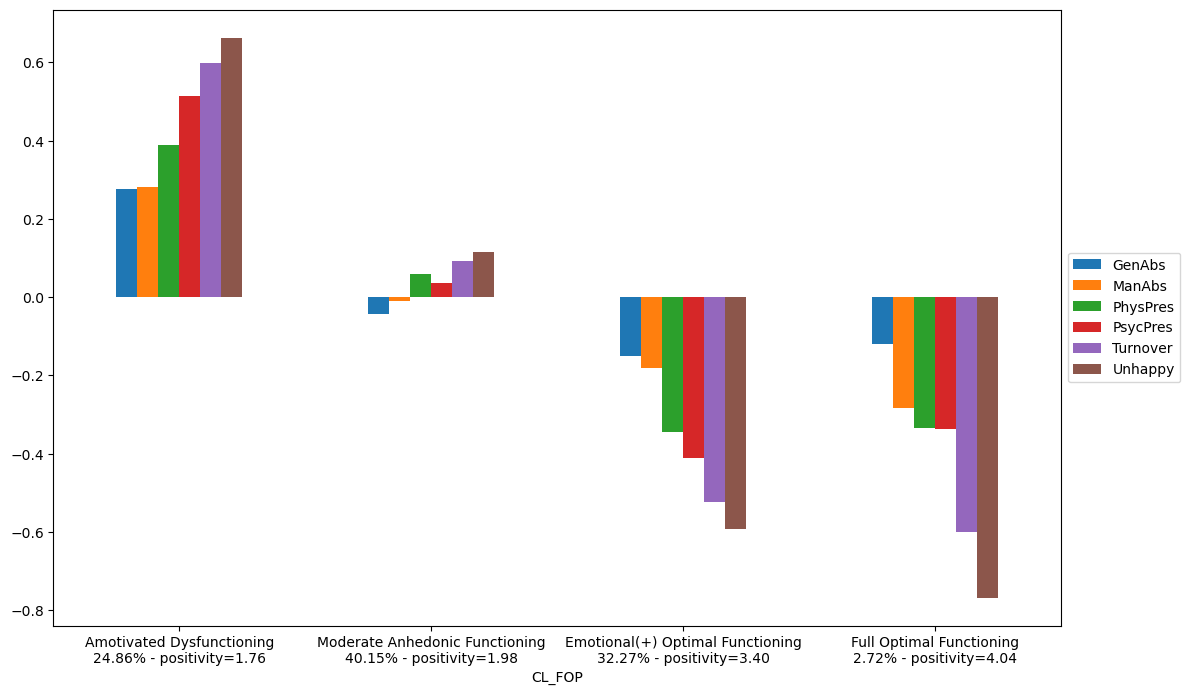

In [127]:
# plot the standardized PSR item scores per latent class
group_rps_std.plot(kind='bar', figsize=(13,8))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xticks(rotation=0)
plt.show()

### Step 3 : Explore profiles of FOP by Socio Demographic variables

In [112]:
socdem_df = data.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,32]]

In [113]:
socdem_df.info()
socdem_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sexe         1066 non-null   int64  
 1   Situfam      1066 non-null   int64  
 2   Situpro      1066 non-null   int64  
 3   Revenus      1066 non-null   int64  
 4   Nivetude     1066 non-null   int64  
 5   Taillentrep  1066 non-null   int64  
 6   Manager      1066 non-null   int64  
 7   CSP1         1066 non-null   int64  
 8   CSP2         1066 non-null   int64  
 9   Secteur      1066 non-null   int64  
 10  ZoneFR1      1066 non-null   int64  
 11  ZoneFR2      1066 non-null   int64  
 12  Demarche     1066 non-null   int64  
 13  CL_FOP       1066 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 116.7 KB


,Sexe,Situfam,Situpro,Revenus,Nivetude,Taillentrep,Manager,CSP1,CSP2,Secteur,ZoneFR1,ZoneFR2,Demarche,CL_FOP
0,2,1,2,2,2,1,1,5,56,11,5,8,2,4.0
1,1,2,2,3,2,1,1,6,63,5,4,7,2,3.0
2,2,2,2,1,4,6,1,5,54,4,1,1,2,2.0
3,2,1,2,3,3,5,1,6,65,11,3,6,1,3.0
4,1,1,2,3,3,6,1,5,55,3,1,1,1,2.0


In [114]:
# recoding all categorical variables

socdem_df['Sexe'].replace({1:"Male",2:"Female"}, inplace=True)
socdem_df['Situfam'].replace({1:"Single", 2:"Couple"}, inplace=True)
socdem_df['Situpro'].replace({1:"Self-employed ", 2:"Salary Employed", 5:"Transition"}, inplace=True)
socdem_df['Revenus'].replace({1: "< 6000€",
    2: "6000 to 11900€",
    3: "11901 to 26490€",
    4: "26491 to 70900€",
    5: "70901 to 150000€",
    6: "more than 150000€"}, inplace=True)
socdem_df['Nivetude'].replace({1: "Without a diploma or Middle School Certificate",
    2: "CAP/BEP: Vocational certificate",
    3: "2 years of higher education",
    4: "3 years of higher education",
    5: "4 years of higher education",
    6: "Master's degree or higher"}, inplace=True)
socdem_df['Taillentrep'].replace({    1: "< 10 employees",
    2: "10 to 49 employees",
    3: "50 to 199 employees",
    4: "200 to 499 employees",
    5: "500 to 2000 employees",
    6: "2000+ employees"},inplace=True)
socdem_df['Manager'].replace({1:"No", 2:"Middle Manager", 3:"Senior Manager", 4:"Business Owner"},inplace=True)
socdem_df['CSP1'].replace({1:"Farmers",
    2: "Artisans, traders and business leaders",
    3: "Executives, higher intellectual professions...",
    4: "Intermediate professions",
    5: "Employees",
    6: "Workers"},inplace=True)
socdem_df['CSP2'].replace({
    10: "Farmers",
    21: "Craftsmen",
    22: "Shopkeepers and related occupations",
    23: "Business owners with 10 or more employees",
    31: "Liberal professions",
    33: "Public service executives",
    34: "Teachers, scientific professions",
    35: "Information, arts, and entertainment professions",
    37: "Administrative and commercial managers of businesses",
    38: "Engineers and technical managers of businesses",
    42: "Primary school teachers and related professions",
    43: "Intermediate professions in health and social work",
    44: "Clergy, religious workers",
    45: "Intermediate administrative professions in the public service",
    46: "Intermediate administrative and commercial professions in businesses",
    47: "Technicians (except tertiary technicians)",
    48: "Foremen, supervisors (excluding administrative supervisors)",
    52: "Civil employees and service agents in the public service",
    53: "Security agents",
    54: "Administrative employees of businesses",
    55: "Sales employees",
    56: "Personal service workers",
    62: "Skilled industrial workers",
    63: "Skilled craft workers",
    64: "Drivers",
    65: "Skilled handlers, warehouse and transport workers",
    67: "Unskilled industrial workers",
    68: "Unskilled craft workers",
    69: "Agricultural workers and related occupations"
}
, inplace=True)
socdem_df['Secteur'].replace({
    1: "Industry",
    2: "Construction",
    3: "Commerce and repair",
    4: "Transportation and storage",
    5: "Accommodation and food services",
    6: "Information and communication",
    7: "Financial and insurance activities",
    8: "Real estate activities",
    9: "Business support services",
    10: "Education, health, and social work",
    11: "Household services",
    12: "Other"
}
,inplace=True)
socdem_df['ZoneFR1'].replace({
    0: np.nan,
    1: "Île-de-France",
    2: "North-West",
    3: "North-East",
    4: "South-West",
    5: "South-East"
}
, inplace=True)
socdem_df['ZoneFR2'].replace({
    0: np.nan,
    1: "Île-de-France",
    2: "Western Paris Suburbs",
    3: "West",
    4: "North",
    5: "East",
    6: "Eastern Paris Suburbs",
    7: "South-West",
    8: "Central-East",
    9: "Mediterranean"
}
,inplace=True)
socdem_df['Demarche'].replace({1:'Yes', 2:'No'},inplace=True)

C:\Users\Franck\AppData\Local\Temp\ipykernel_2580\163808610.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  socdem_df['Sexe'].replace({1:"Male",2:"Female"}, inplace=True)
C:\Users\Franck\AppData\Local\Temp\ipykernel_2580\163808610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socdem_df['Sexe'].replace({1:"Male",2:"Female"}, inplace=T

In [115]:
# recoding the latent classes categories
socdem_df['CL_FOP'].replace({
    1.0:"Full Optimal Functioning",
    2.0:"Moderate Anhedonic Dysfunctioning",
    3.0:"Amotivated Dysfunctioning",
    4.0:"Emotional Optimal Functioning"
    }, inplace=True)

C:\Users\Franck\AppData\Local\Temp\ipykernel_2580\1155525138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  socdem_df['CL_FOP'].replace({
C:\Users\Franck\AppData\Local\Temp\ipykernel_2580\1155525138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socdem_df['CL_FOP'].replace({


In [116]:
# check
socdem_df.head()

,Sexe,Situfam,Situpro,Revenus,Nivetude,Taillentrep,Manager,CSP1,CSP2,Secteur,ZoneFR1,ZoneFR2,Demarche,CL_FOP
0,Female,Single,Salary Employed,6000 to 11900€,CAP/BEP: Vocational certificate,< 10 employees,No,Employees,Personal service workers,Household services,South-East,Central-East,No,Emotional Optimal Functioning
1,Male,Couple,Salary Employed,11901 to 26490€,CAP/BEP: Vocational certificate,< 10 employees,No,Workers,Skilled craft workers,Accommodation and food services,South-West,South-West,No,Amotivated Dysfunctioning
2,Female,Couple,Salary Employed,< 6000€,3 years of higher education,2000+ employees,No,Employees,Administrative employees of businesses,Transportation and storage,Île-de-France,Île-de-France,No,Moderate Anhedonic Dysfunctioning
3,Female,Single,Salary Employed,11901 to 26490€,2 years of higher education,500 to 2000 employees,No,Workers,"Skilled handlers, warehouse and transport workers",Household services,North-East,Eastern Paris Suburbs,Yes,Amotivated Dysfunctioning
4,Male,Single,Salary Employed,11901 to 26490€,2 years of higher education,2000+ employees,No,Employees,Sales employees,Commerce and repair,Île-de-France,Île-de-France,Yes,Moderate Anhedonic Dysfunctioning


In [117]:
# save in a new data frame
socdem_data = socdem_df.copy()

In [118]:
""" def con_table(row_var,col_var):
    import pandas as pd
    import numpy as np
    from scipy.stats import chi2_contingency
    
    obs_df = pd.crosstab(row_var, col_var, margins=True)
    obs = obs_df.iloc[0:-1,0:-1]
    chi2, p, dof, exp = chi2_contingency(obs)
    exp = pd.DataFrame(exp, index=obs.index, columns=obs.columns)
    res = (obs-exp)/np.sqrt(exp)
    
    return obs, exp, res, chi2, p, dof """

' def con_table(row_var,col_var):\n    import pandas as pd\n    import numpy as np\n    from scipy.stats import chi2_contingency\n    \n    obs_df = pd.crosstab(row_var, col_var, margins=True)\n    obs = obs_df.iloc[0:-1,0:-1]\n    chi2, p, dof, exp = chi2_contingency(obs)\n    exp = pd.DataFrame(exp, index=obs.index, columns=obs.columns)\n    res = (obs-exp)/np.sqrt(exp)\n    \n    return obs, exp, res, chi2, p, dof '

In [119]:
""" def plot_con_table(obs, size=(10, 8)):

    import matplotlib.pyplot as plt
    
   
    # Plotting the side-by-side bar chart
    obs.plot(kind='bar', stacked=False, figsize=size)
    plt.xlabel(row_var)
    plt.ylabel(col_var)
    plt.title(f'Side-by-Side Bar Chart of {col_var} by {row_var}')
    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
    plt.show() """

" def plot_con_table(obs, size=(10, 8)):\n\n    import matplotlib.pyplot as plt\n    \n   \n    # Plotting the side-by-side bar chart\n    obs.plot(kind='bar', stacked=False, figsize=size)\n    plt.xlabel(row_var)\n    plt.ylabel(col_var)\n    plt.title(f'Side-by-Side Bar Chart of {col_var} by {row_var}')\n    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary\n    plt.show() "

In [120]:
def con_table(row_var,col_var, pearson = False):
    import pandas as pd
    import numpy as np
    from scipy.stats import chi2_contingency
    import statsmodels.api as sm
    
    obs = pd.crosstab(row_var, col_var)
    chi2, p, dof, exp = chi2_contingency(obs)
    table = sm.stats.Table(obs)
    obs = table.table_orig
    exp = table.fittedvalues

    if pearson :
        res = table.resid_pearson
    else :
        res = table.standardized_resids
    
    return obs, exp, res, chi2, p, dof

In [121]:
# plot residuals
def res_plot(res, row_var, col_var, size = (10,7), loc='lower center') :
    from scipy.stats import norm

    # Calculate the normal quantile for the given probability
    quantile_0_05 = norm.ppf(0.025)
    quantile_0_10 = norm.ppf(0.05)
    res.plot(kind = 'bar', figsize = size)
    plt.title(f'Residual plot of {col_var} as a function of {row_var}')
    plt.axhline(y=-quantile_0_05, color='r', linestyle='', linewidth=1, label = f'p_value : {p:.3f}')
    plt.axhline(y=-quantile_0_05, color='r', linestyle='--', linewidth=1)    
    plt.axhline(y=quantile_0_05, color='r', linestyle='--', linewidth=1, label='alpha=0.05 Significance Threshold')
    plt.axhline(y=-quantile_0_10, color='grey', linestyle='--', linewidth=1)    
    plt.axhline(y=quantile_0_10, color='grey', linestyle='--', linewidth=1, label='alpha=0.10 Significance Threshold')    
    plt.xlabel(row_var)
    plt.ylabel('Standardized Residuals')
    plt.legend(loc=loc, bbox_to_anchor=(1.20,0.35))
    plt.xticks(rotation=90)
    plt.show()

In [122]:
socdem_data.columns[:-1]

Index(['Sexe', 'Situfam', 'Situpro', 'Revenus', 'Nivetude', 'Taillentrep',
       'Manager', 'CSP1', 'CSP2', 'Secteur', 'ZoneFR1', 'ZoneFR2', 'Demarche'],
      dtype='object')

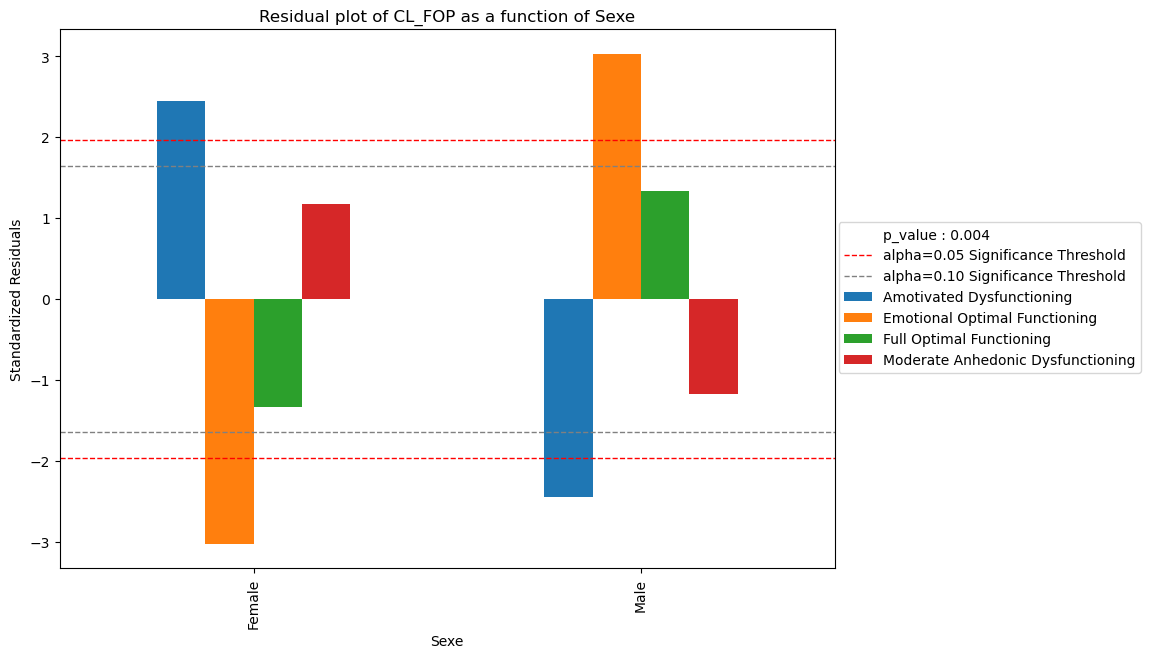

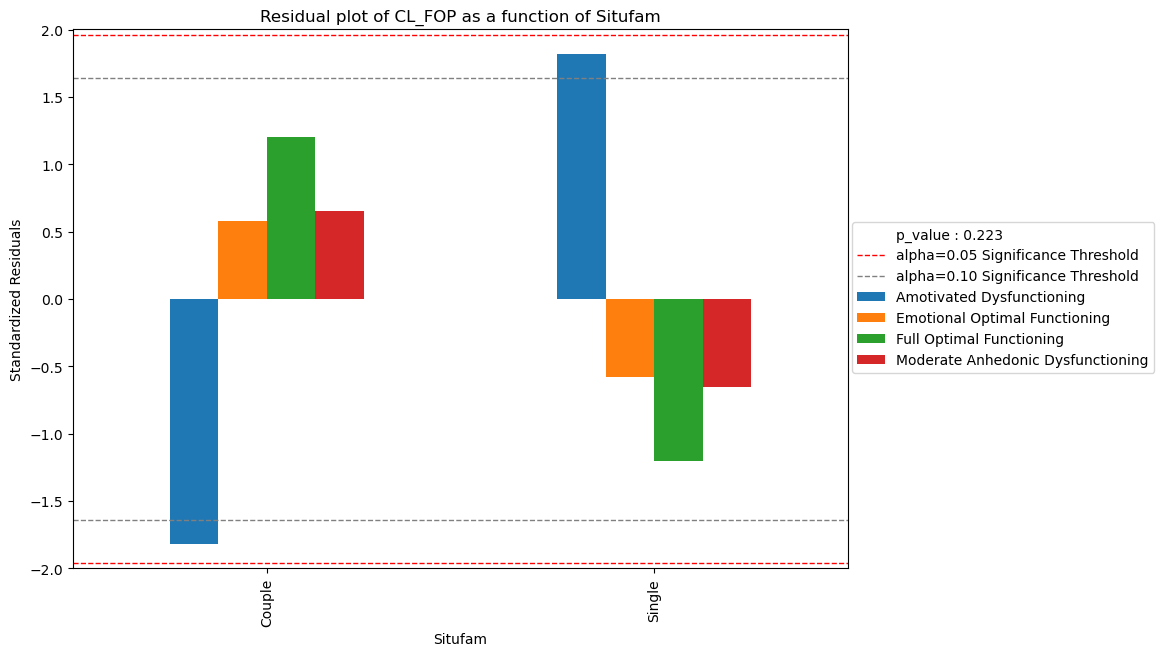

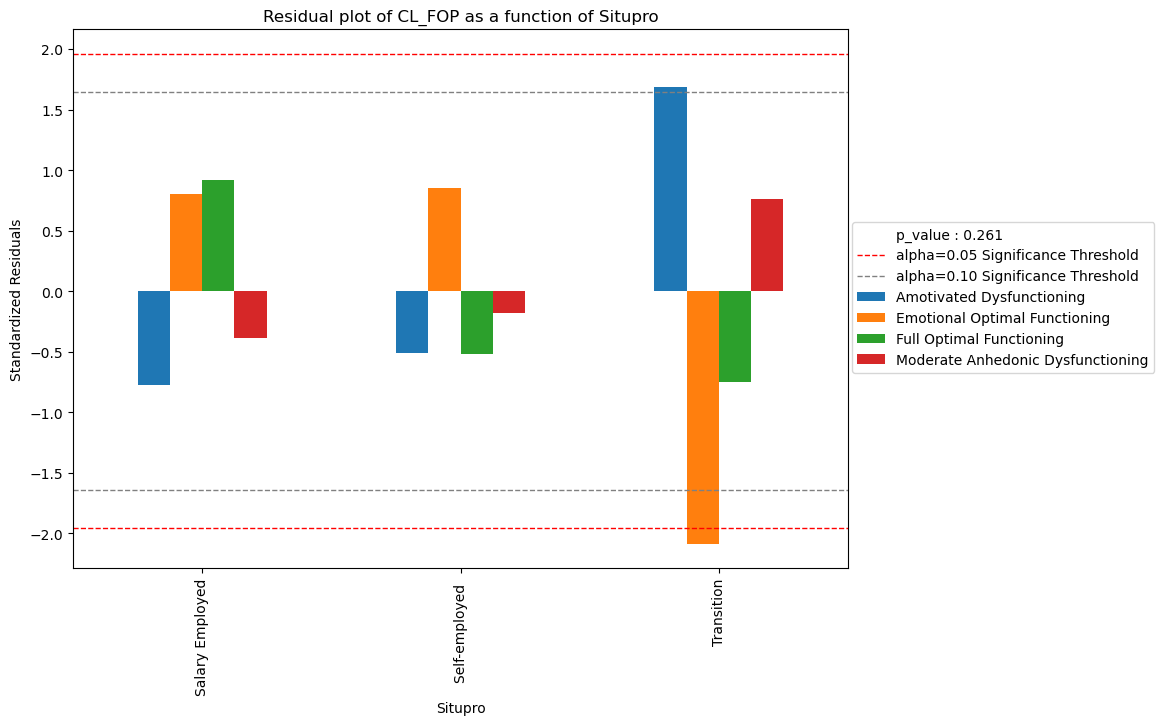

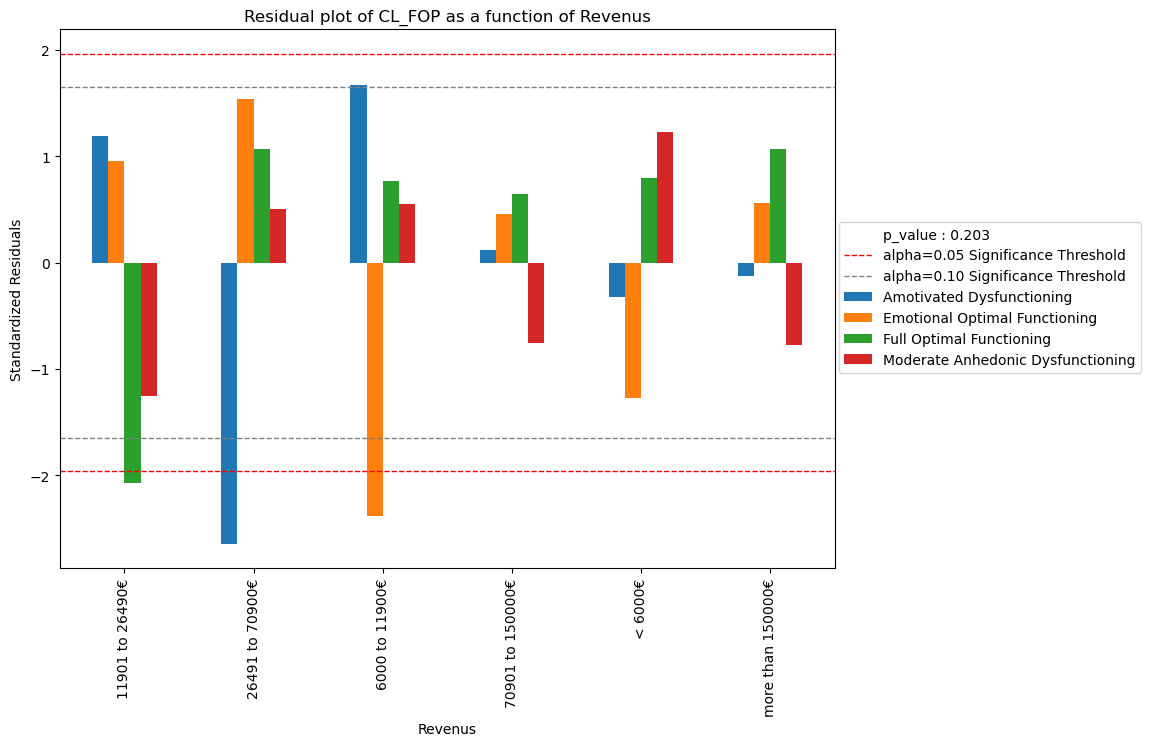

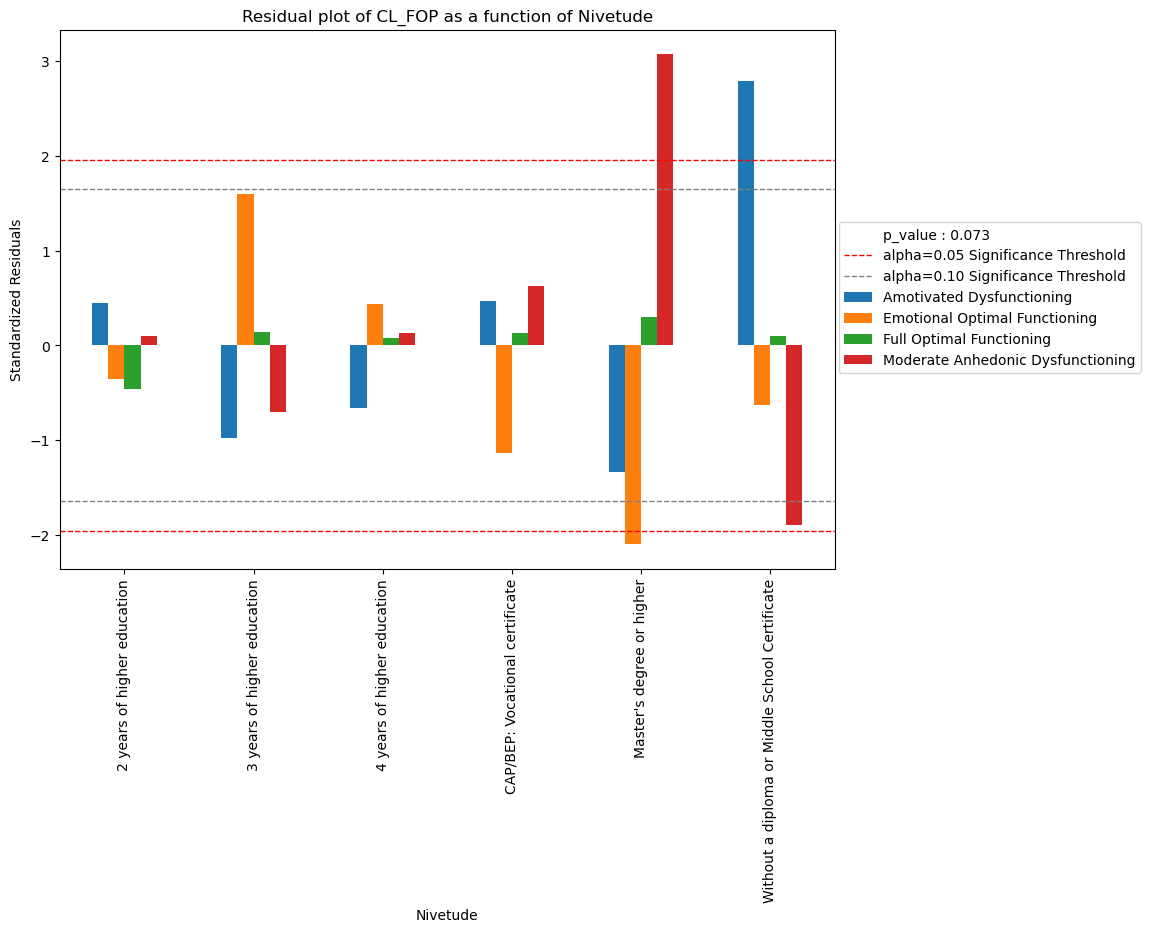

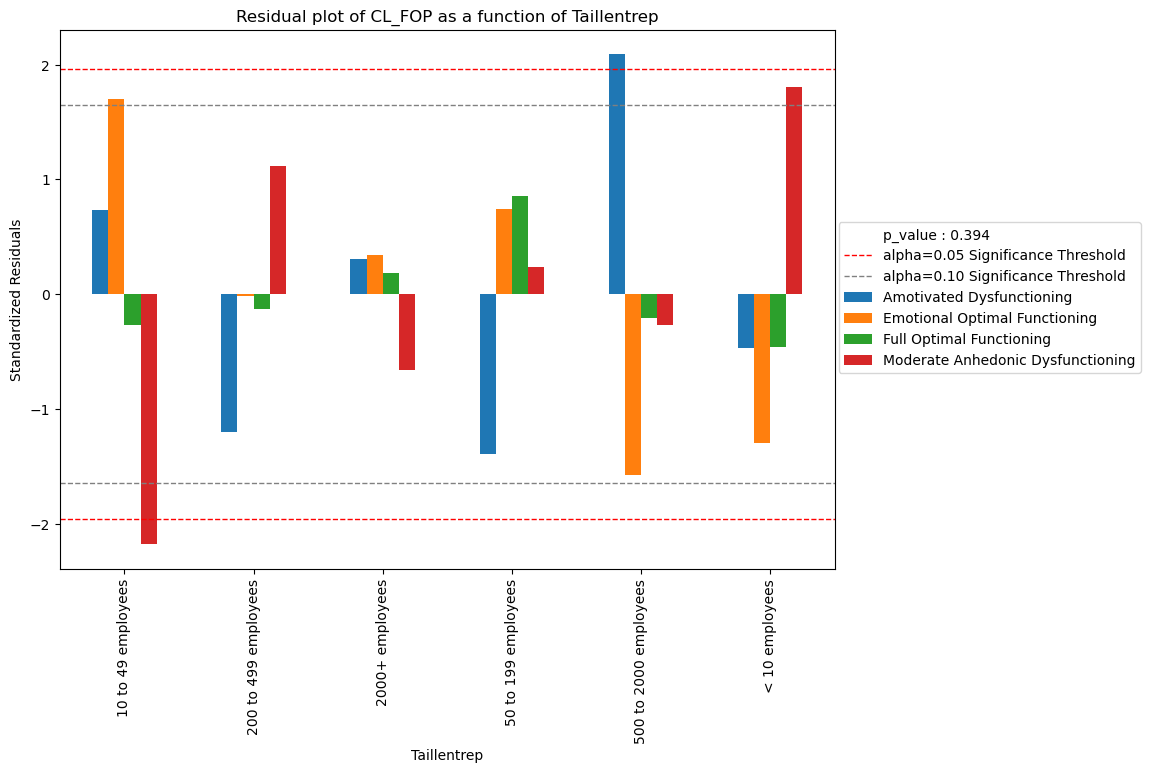

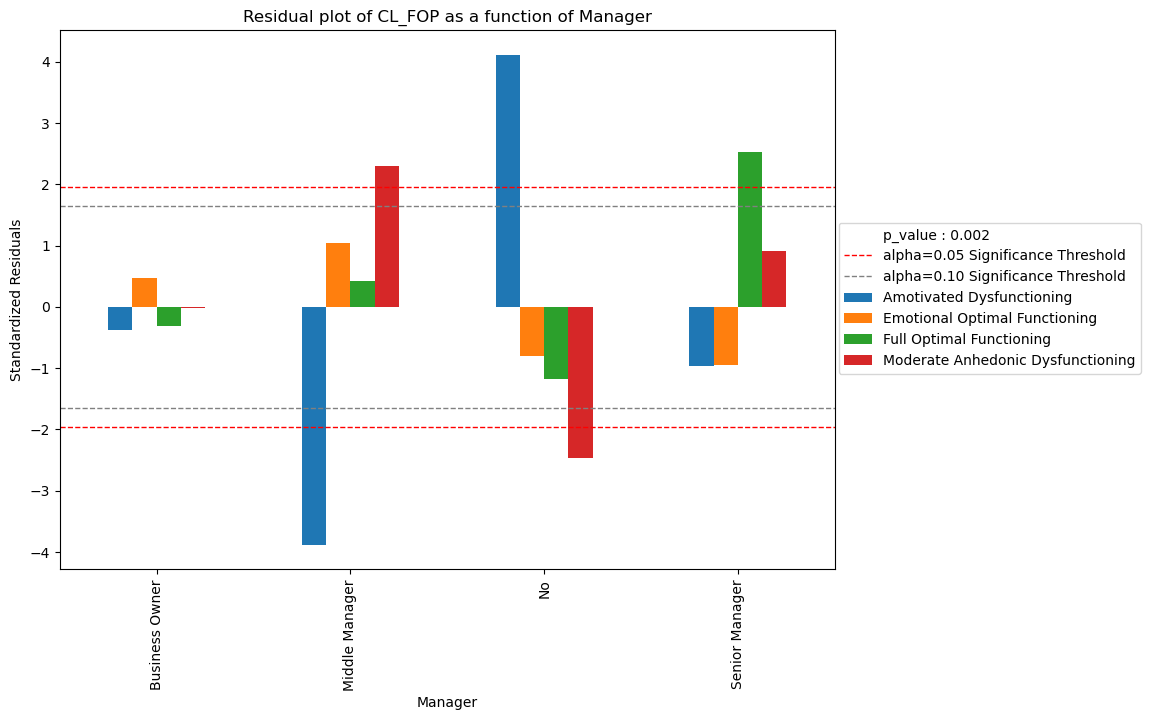

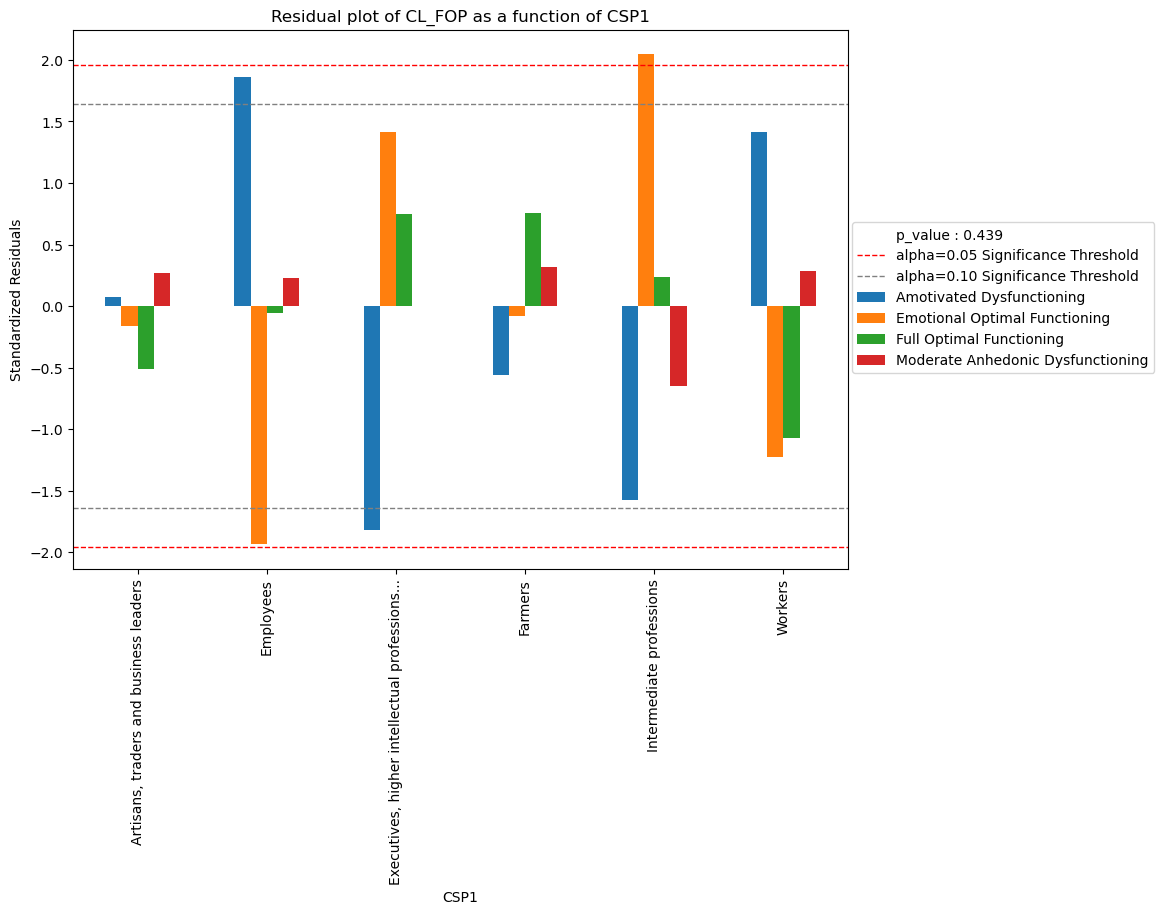

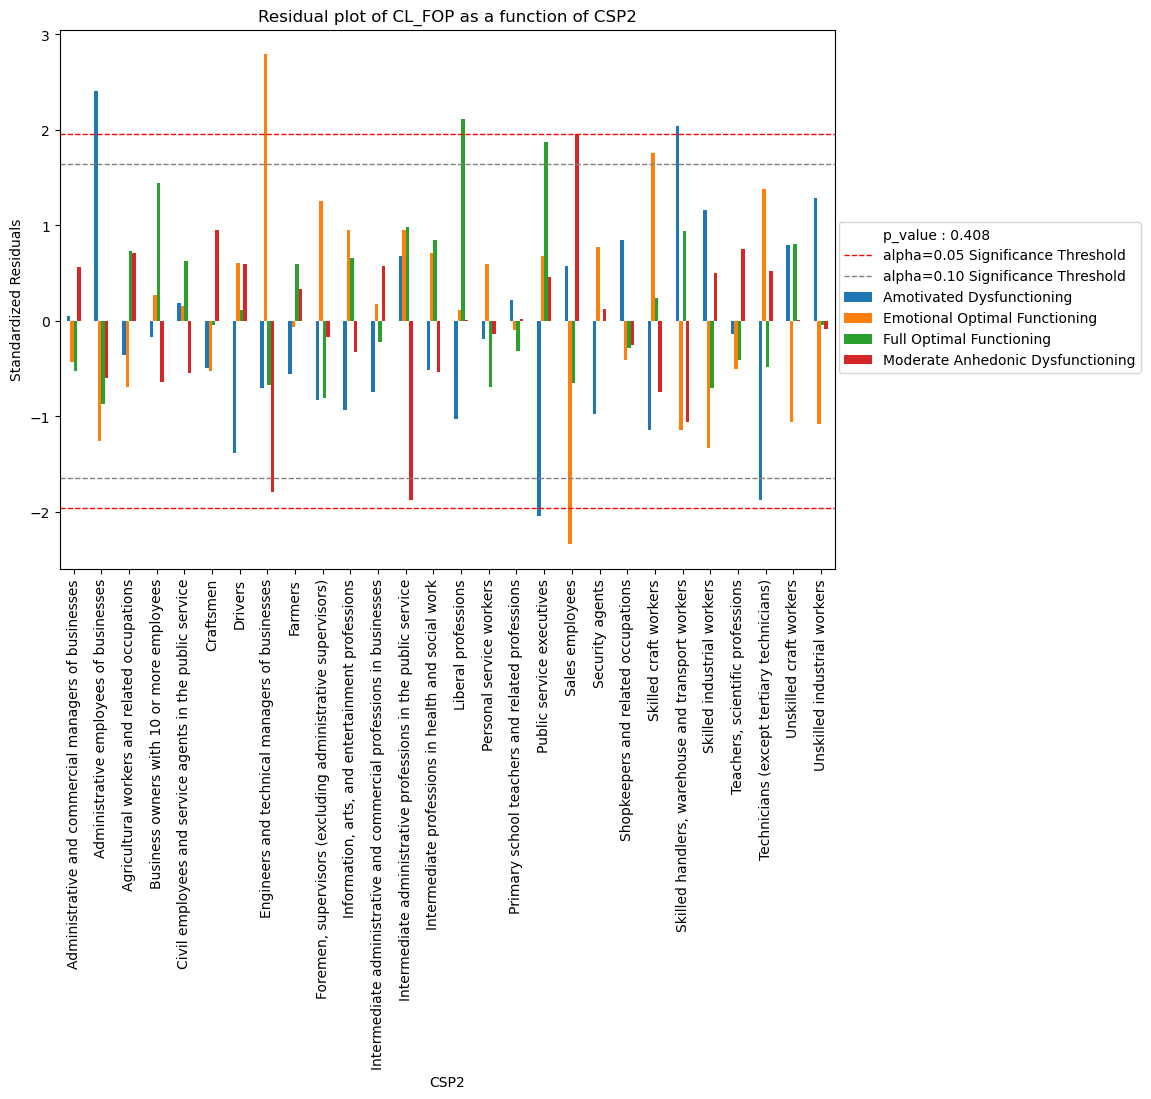

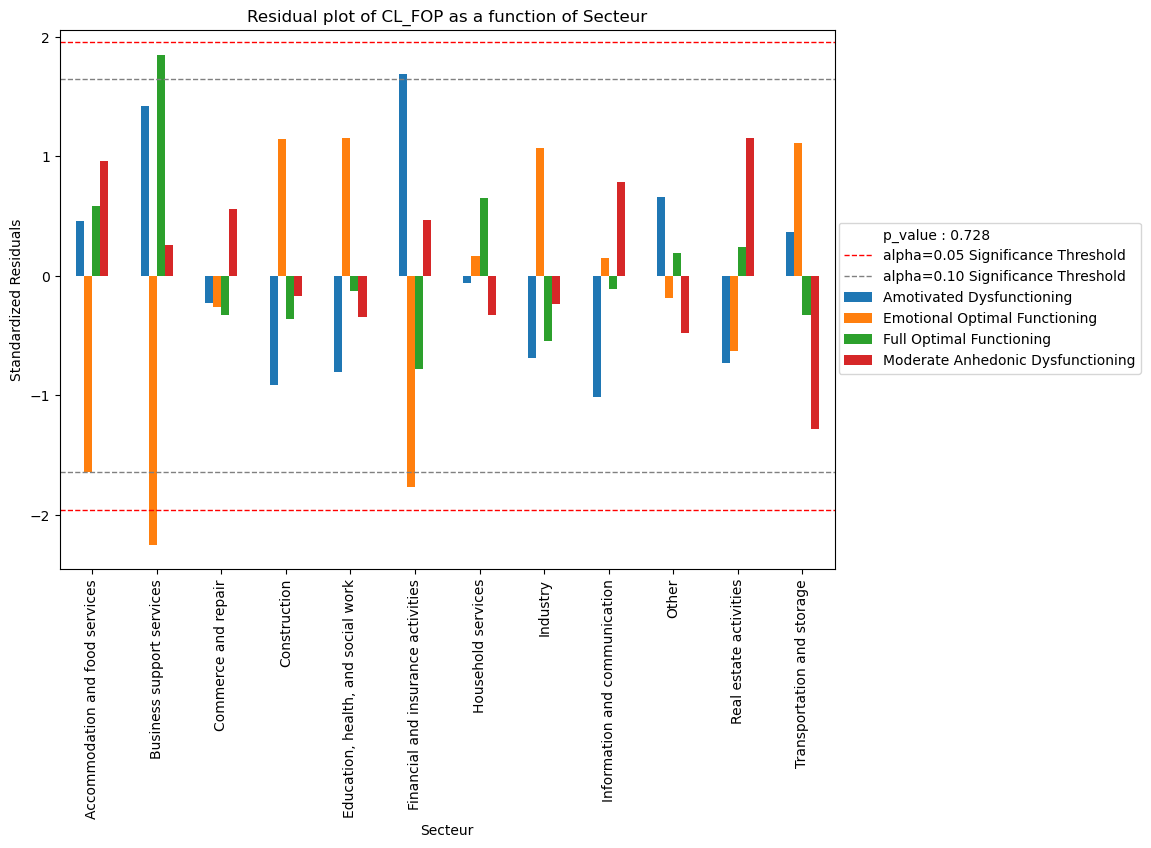

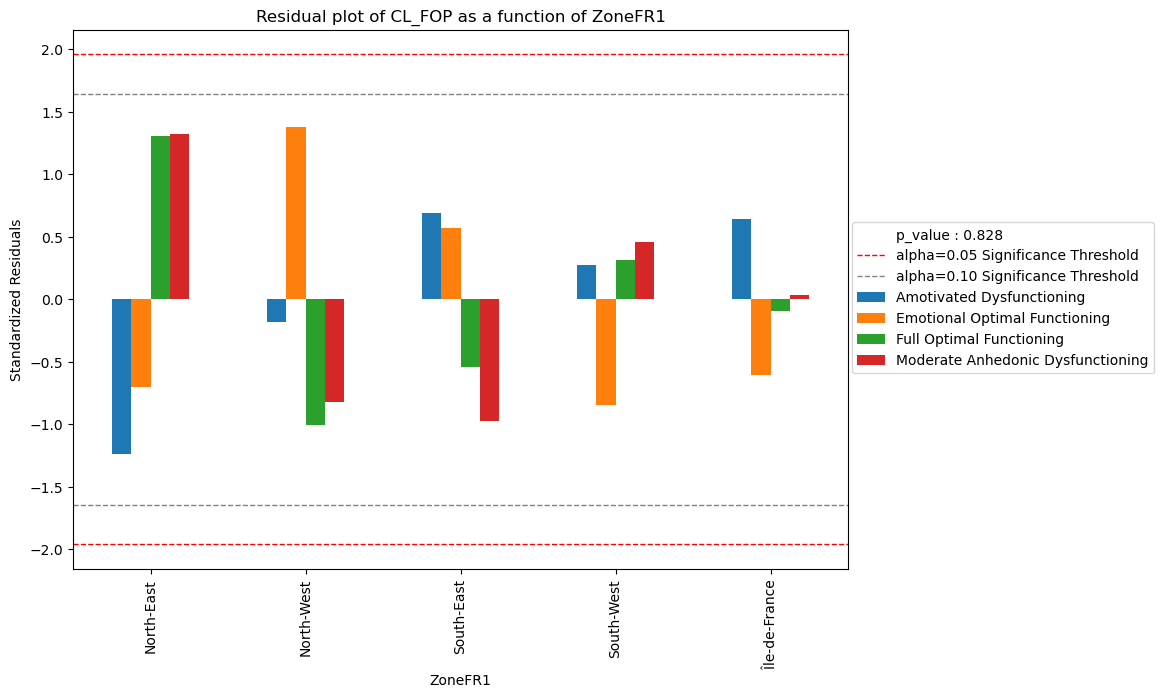

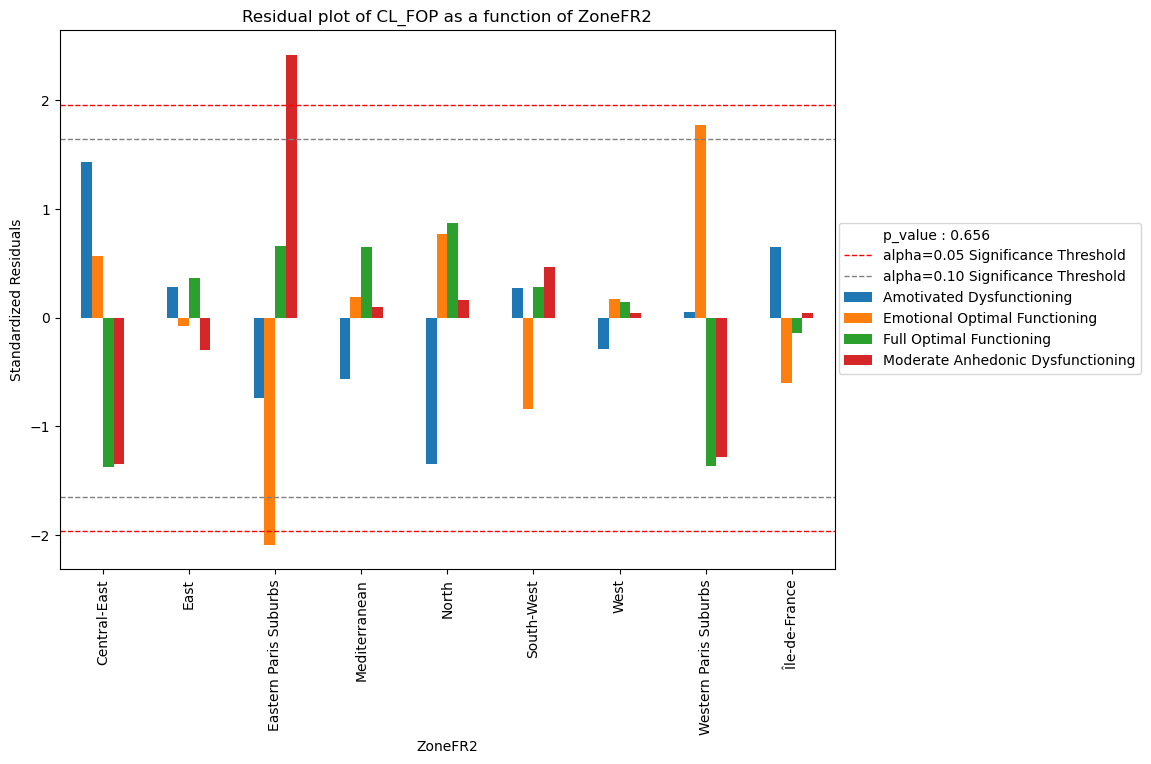

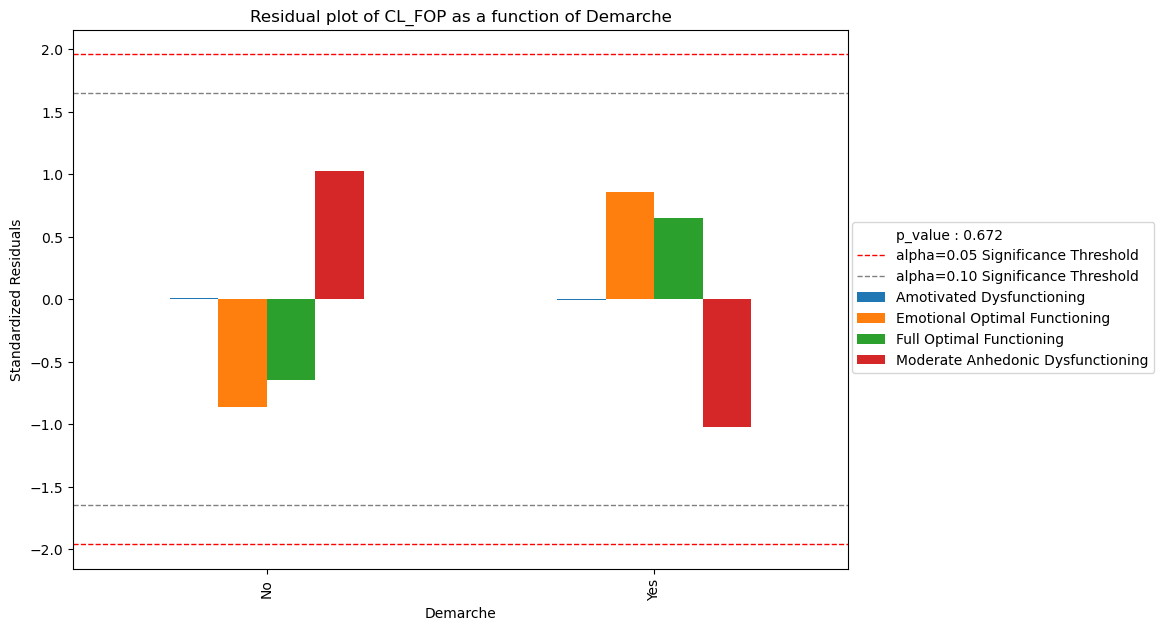

In [123]:
obs_list = []
exp_list = []
res_list = []
chi2_list = []
p_list = []
dof_list = []
for col in socdem_data.columns[:-1] :
    row_var = col
    col_var = 'CL_FOP'
    
    X = socdem_data[row_var]
    Y = socdem_data[col_var]

    obs, exp, res, chi2, p, dof = con_table(X,Y)
    obs_list.append(obs)
    exp_list.append(exp)
    res_list.append(res)
    chi2_list.append(chi2)
    p_list.append(p)
    dof_list.append(dof)

    res_plot(res, row_var, col_var)